<a href="https://colab.research.google.com/github/a6iyyu/MachineLearning_3F_23/blob/main/JS9/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **☘️ Praktikum 0**

## **Random Split**

Pada pratikum ini, kita akan mencoba 3 macam strategi pembuatan data latih, validasi, dan uji. Data yang digunakan adalah data kapal Titanic yang sudah kita ekstraksi fiturnya pada pratikum sebelumnya.

In [7]:
from google.colab import files
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [8]:
file_name = 'insurance.csv'

if not os.path.exists(file_name):
  print(f"File '{file_name}' tidak ditemukan. Silakan unggah file.")
  files.upload()
else:
  print(f"File '{file_name}' sudah ada.")

try:
    df = pd.read_csv(file_name)
    print(f"Dataset {file_name} berhasil dimuat.")
except FileNotFoundError:
    print(f"Error: File {file_name} tidak ditemukan. Mohon unggah file terlebih dahulu.")
    exit()

File 'insurance.csv' sudah ada.
Dataset insurance.csv berhasil dimuat.


In [5]:
df = pd.read_csv(file_name)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Pisahkan antara fitur (X) dan target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Identifikasi kolom numerik dan kategorikal
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Buat pipeline preprocessing untuk menangani data numerik dan kategorikal secara berbeda
preprocessor = ColumnTransformer(
  transformers=[('num', StandardScaler(), numerical_features), ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Bagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Buat pipeline lengkap: preprocessing -> model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Untuk SVR, kita juga perlu melakukan scaling pada variabel target (y)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Buat pipeline SVR
svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR(kernel='rbf'))])
svr_pipeline.fit(X_train, y_train_scaled)

y_pred_svr_scaled = svr_pipeline.predict(X_test)
y_pred_svr = y_scaler.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()

In [14]:
print("\n--- Hasil Evaluasi Model ---")
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Regresi Linear R-squared (R²): {r2_lr:.4f}")
print(f"Regresi Linear Mean Absolute Error (MAE): ${mae_lr:,.2f}")

r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"\nSVR R-squared (R²): {r2_svr:.4f}")
print(f"SVR Mean Absolute Error (MAE): ${mae_svr:,.2f}")


--- Hasil Evaluasi Model ---
Regresi Linear R-squared (R²): 0.7836
Regresi Linear Mean Absolute Error (MAE): $4,181.19

SVR R-squared (R²): 0.8474
SVR Mean Absolute Error (MAE): $2,543.44


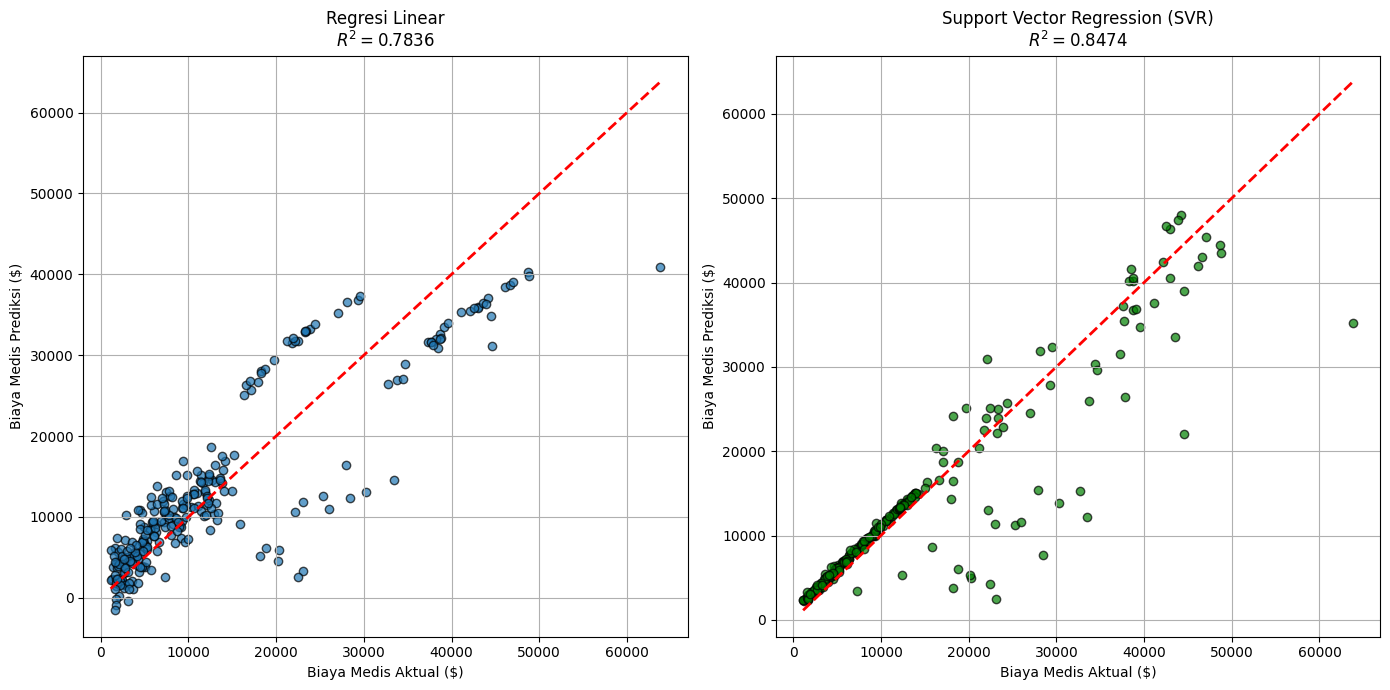


Visualisasi perbandingan model disimpan sebagai 'perbandingan_model_regresi.png'


In [15]:
# Plot Regresi Linear
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Regresi Linear\n$R^2 = {r2_lr:.4f}$")
plt.xlabel("Biaya Medis Aktual ($)")
plt.ylabel("Biaya Medis Prediksi ($)")
plt.grid(True)

# Plot SVR
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svr, alpha=0.7, edgecolors='k', c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Support Vector Regression (SVR)\n$R^2 = {r2_svr:.4f}$")
plt.xlabel("Biaya Medis Aktual ($)")
plt.ylabel("Biaya Medis Prediksi ($)")
plt.grid(True)

plt.tight_layout()
plt.savefig("perbandingan_model_regresi.png")
plt.show()
print("\nVisualisasi perbandingan model disimpan sebagai 'perbandingan_model_regresi.png'")